In [ ]:
from datetime import datetime 
import numpy as np 
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

In [ ]:
assets =['FB','AMZN','AAPL','NFLX','GOOG']



In [ ]:
weights = np.array([0.2,0.2,0.2,0.2,0.2])
startStockDate='2013-01-01'
today = datetime.today().strftime('%Y-%m-%d')

In [ ]:
df=pd.DataFrame()

In [ ]:
for stock in assets:
  df[stock]=web.DataReader(stock,data_source='yahoo',start=startStockDate,end=today)['Adj Close']
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.378807,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.515701,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.635078,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.249001,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.424622,13.880000,365.280823
...,...,...,...,...,...
2020-08-03,251.960007,3111.889893,434.965759,498.619995,1474.449951
2020-08-04,249.830002,3138.830078,437.870514,509.640015,1464.969971
2020-08-05,249.119995,3205.030029,439.457642,502.109985,1473.609985


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'upperLeft'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


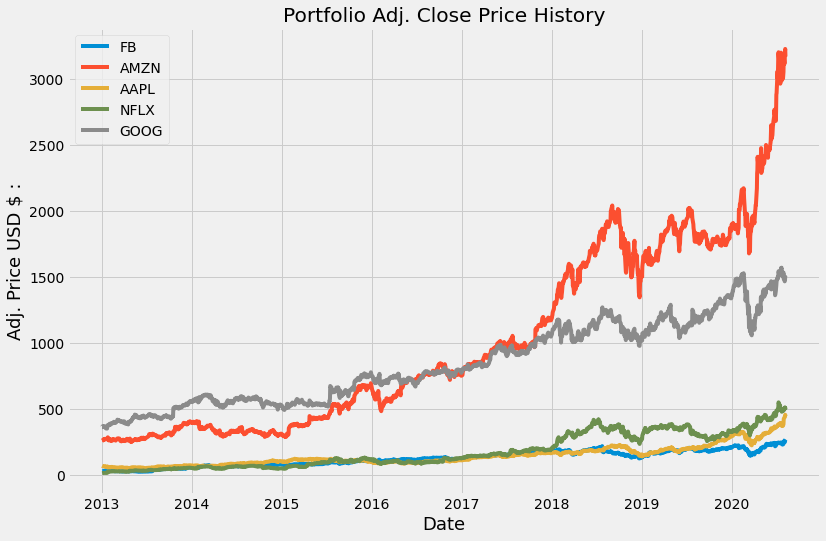

In [ ]:
title = 'Portfolio Adj. Close Price History'

my_stocks = df
plt.figure(figsize=(12,8))

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Adj. Price USD $ :', fontsize =18)
plt.legend(my_stocks.columns.values, loc ='upperLeft')

In [ ]:
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-08-03,-0.006741,-0.016681,0.025198,0.019923,-0.005739
2020-08-04,-0.008454,0.008657,0.006678,0.022101,-0.006430
2020-08-05,-0.002842,0.021091,0.003625,-0.014775,0.005898


In [ ]:
cov_matrix_annual = returns.cov()*252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.117348,0.052715,0.042448,0.054601,0.048801
AMZN,0.052715,0.092741,0.036639,0.061688,0.046750
AAPL,0.042448,0.036639,0.078009,0.032439,0.037261
NFLX,0.054601,0.061688,0.032439,0.212082,0.048971
GOOG,0.048801,0.046750,0.037261,0.048971,0.065011


In [ ]:
#Calulating Portfolio Variance
port_variance=np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.059592653433027956

In [ ]:
#portfolio volatility or standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility


0.24411606549555062

In [ ]:
#annual portfolio retunrs
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

0.3637935763014299

In [ ]:
# annula return, volatilty(risk and variance)
percent_var = str(round(port_variance, 2)*100)+'%'
percent_vols= str(round(port_volatility,2)*100) +'%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'

print('Expected annual return :'+ percent_ret)
print('Annual volatility/risk:' + percent_vols)
print('Annula variance :'+ percent_var)

Expected annual return :36.0%
Annual volatility/risk:24.0%
Annula variance :6.0%


In [ ]:
pip install PyPortfolioOpt


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns


In [ ]:
#calculating the expected retruns and the annualized sample covariance matrix of asset returns
#mean
M = expected_returns.mean_historical_return(df)

#Sample Covarinace
S = risk_models.sample_cov(df)

# optimize for max sharp ratio
ef = EfficientFrontier(M,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

print(cleaned_weights)
ef.portfolio_performance(verbose =True)


OrderedDict([('FB', 0.13555), ('AMZN', 0.29634), ('AAPL', 0.26205), ('NFLX', 0.30606), ('GOOG', 0.0)])
Expected annual return: 41.3%
Annual volatility: 26.3%
Sharpe Ratio: 1.49


(0.41255292546447064, 0.26341720441999966, 1.4902326760653546)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices , total_portfolio_value = 20000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation :', allocation)
print('Funds remaining $:{:.2f}'.format(leftover))



Discrete allocation : {'FB': 10.0, 'AMZN': 2.0, 'AAPL': 11.0, 'NFLX': 12.0}
Funds remaining $:154.97
